<a href="https://colab.research.google.com/github/RakshithSuresh/ML-Projects/blob/main/Drug_Effectiveness_Prediction(regression_tree).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
# importing libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
# reading dataset
df = pd.read_csv('Synthetic_Drug_Effectiveness_Data.csv')

In [92]:
df.head()

,Dosage,Age,Sex,Drug Effectiveness
0,38,56,Male,34.592899
1,28,55,Female,47.671233
2,14,21,Female,93.174719
3,7,22,Male,9.680815
4,20,71,Male,89.389566


In [93]:
df.isnull().sum()

,0
Dosage,0
Age,0
Sex,0
Drug Effectiveness,0


In [94]:
# changing the field name
df.rename(columns={'Drug Effectiveness':'DrugEffectiveness'},inplace=True)

In [95]:
# Encoding Sex variable
df['Sex_encoded'] = df['Sex'].map({'Male': 1, 'Female': 0})

<Axes: xlabel='Sex', ylabel='DrugEffectiveness'>

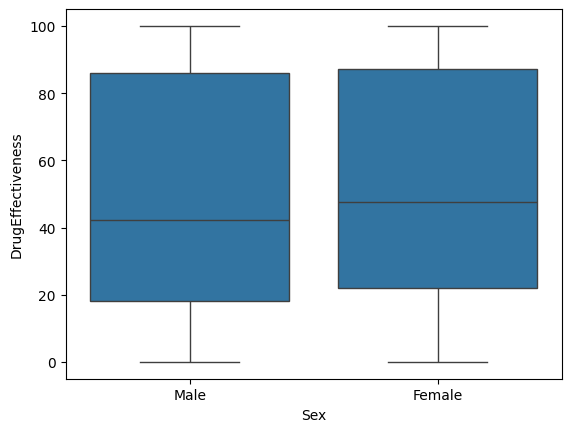

In [96]:
# visualizing the sex vs drug effectiveness using box plot
sns.boxplot(x='Sex',y='DrugEffectiveness',data=df)

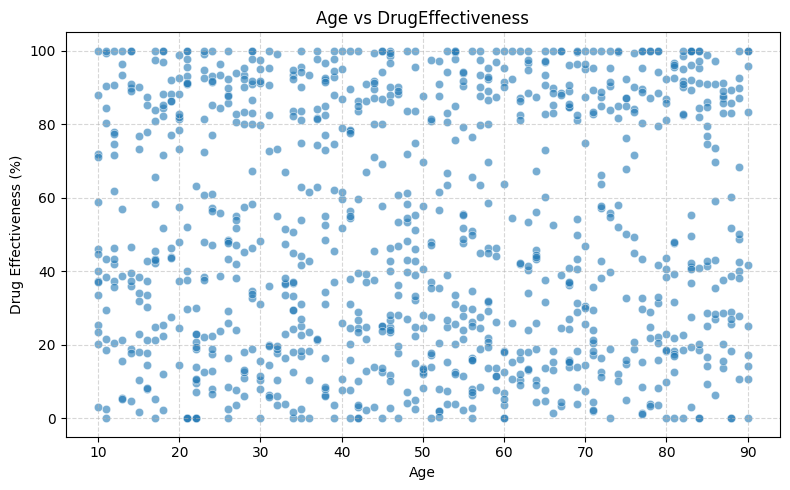

In [97]:
# Scatter plot: Age vs DrugEffectiveness
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='DrugEffectiveness', data=df, alpha=0.6)
plt.title('Age vs DrugEffectiveness')
plt.xlabel('Age')
plt.ylabel('Drug Effectiveness (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


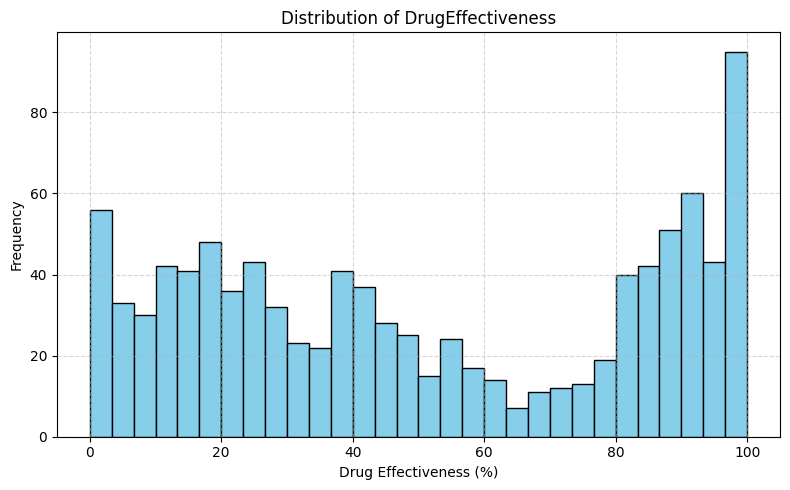

In [98]:
# Histogram: Distribution of DrugEffectiveness
plt.figure(figsize=(8, 5))
plt.hist(df['DrugEffectiveness'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of DrugEffectiveness')
plt.xlabel('Drug Effectiveness (%)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


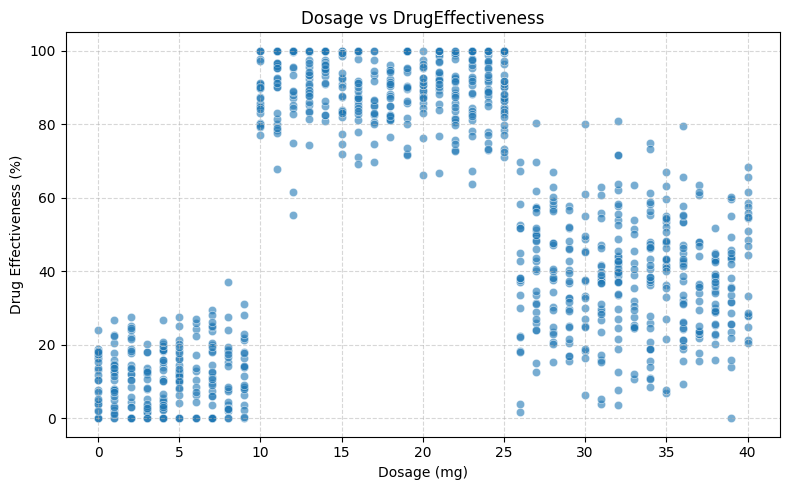

In [99]:
# Scatter plot: Dosage vs DrugEffectiveness
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Dosage', y='DrugEffectiveness', data=df, alpha=0.6)
plt.title('Dosage vs DrugEffectiveness')
plt.xlabel('Dosage (mg)')
plt.ylabel('Drug Effectiveness (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 📋 Exploratory Data Analysis (EDA) Summary — Findings from Charts

We conducted visual analysis to understand how each feature influences **DrugEffectiveness**. The key findings are:

---

### 🔹 1. Sex vs DrugEffectiveness

- A boxplot comparison between Male and Female patients shows that:
  - Females have a slightly higher **median drug effectiveness**
  - Both groups exhibit a **wide range of responses**

**Conclusion:**  
Sex may have a small but non-negligible impact. It should be included in modeling, though it is **not a dominant predictor**.

---

### 🔹 2. Age vs DrugEffectiveness

- Scatter plot analysis shows **no clear trend** or pattern between age and effectiveness.
- Patients across all age ranges (10–90) show a **broad spread of outcomes**.

**Conclusion:**  
Age likely plays a **minor role** individually, but could help when combined with other variables.

---

### 🔹 3. Distribution of DrugEffectiveness

- The histogram of drug effectiveness displays a **multi-modal distribution**:
  - Clusters near **0%** (low effectiveness) and **100%** (high effectiveness)

**Conclusion:**  
This supports the idea that **dosage** levels significantly influence outcomes.

---

### 🔹 4. Dosage vs DrugEffectiveness

- The scatter plot reveals a **clear, structured relationship**:
  - Low doses (0–10 mg): mostly **ineffective**
  - Medium doses (10–25 mg): **highly effective**
  - High doses (>25 mg): effectiveness **drops again**

**Conclusion:**  
**Dosage** is the strongest predictor of drug effectiveness, showing a **non-linear** relationship — perfect for regression tree models.

---

### 🧠 Final Notes

These findings guide our feature selection and modeling approach:

- **Dosage** will drive primary splits in the regression tree.
- **Sex** and **Age** may support performance when used together.
- This validates our use of a **regression tree**, which handles **non-linear and segmented relationships** effectively.


# NORMALIZE IF NEEDED LATER

In [100]:
df.head()

,Dosage,Age,Sex,DrugEffectiveness,Sex_encoded
0,38,56,Male,34.592899,1
1,28,55,Female,47.671233,0
2,14,21,Female,93.174719,0
3,7,22,Male,9.680815,1
4,20,71,Male,89.389566,1


In [101]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np


# Features and target
X = df[['Dosage', 'Age', 'Sex_encoded']]
y = df['DrugEffectiveness']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = DecisionTreeRegressor(max_depth=4, random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

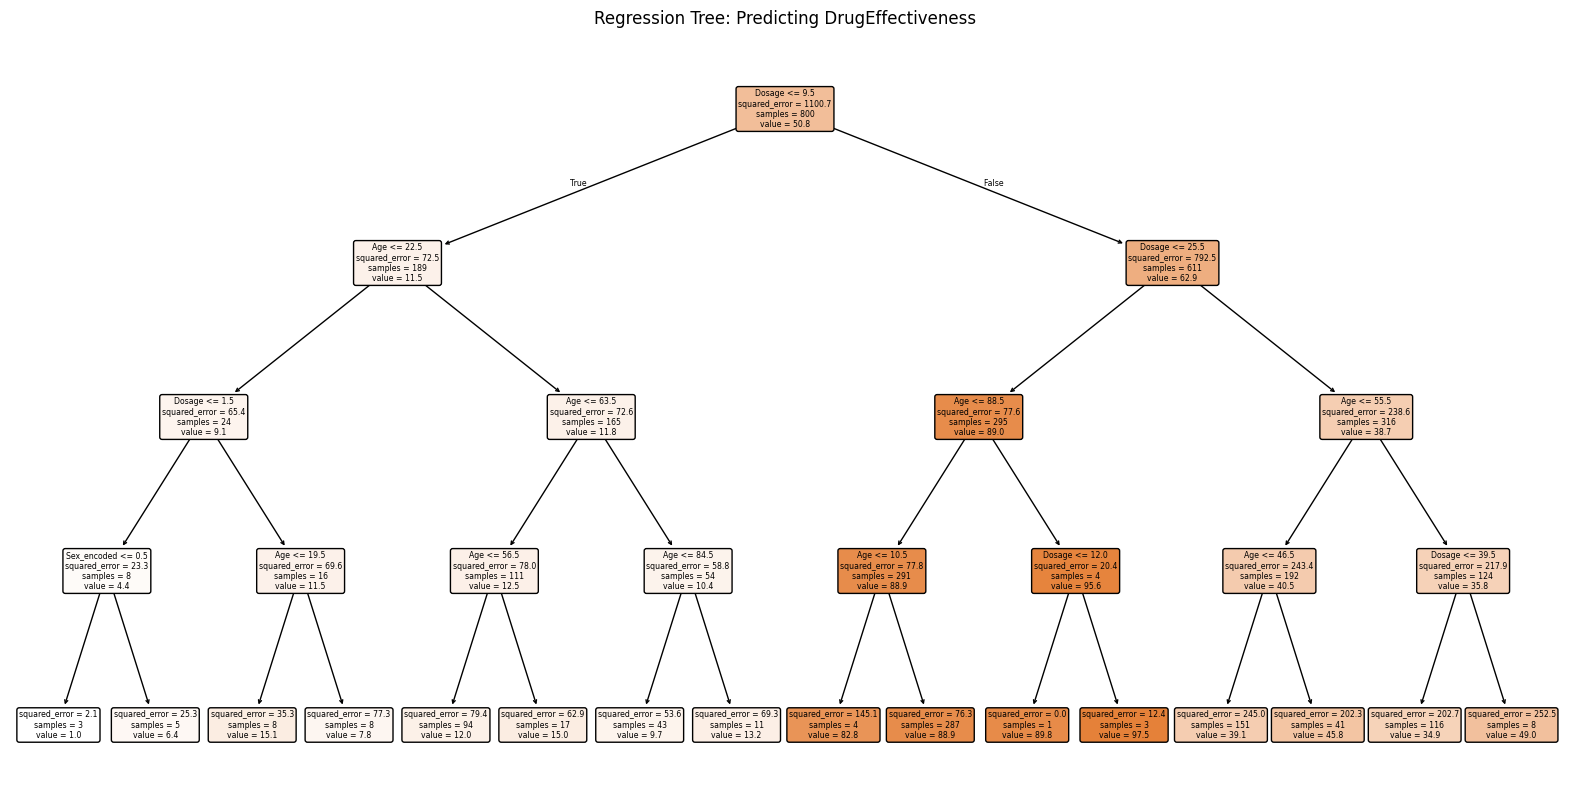

In [102]:
from sklearn.tree import plot_tree

# Set figure size and plot the tree
plt.figure(figsize=(20, 10))
plot_tree(
    model,
    feature_names=['Dosage', 'Age', 'Sex_encoded'],
    filled=True,
    rounded=True,
    precision=1
)
plt.title("Regression Tree: Predicting DrugEffectiveness")
plt.show()


In [103]:
# Predicting and Testing
y_pred = model.predict(X_test)

# Combine X_test with actual and predicted values
comparison_full = X_test.copy()
comparison_full['Actual'] = y_test.values
comparison_full['Predicted'] = y_pred

# Show first 20 rows
comparison_full.head(20)



,Dosage,Age,Sex_encoded,Actual,Predicted
521,15,35,0,83.499833,88.949360
737,3,78,1,3.425678,9.706796
740,24,71,0,95.410568,88.949360
660,4,13,0,5.397366,15.132049
411,25,14,0,100.000000,88.949360
678,31,17,1,5.362244,39.059212
626,27,49,1,46.135421,45.771322
513,15,20,1,82.029972,88.949360
859,5,50,0,13.299795,12.018428
136,35,83,0,41.246837,34.919987


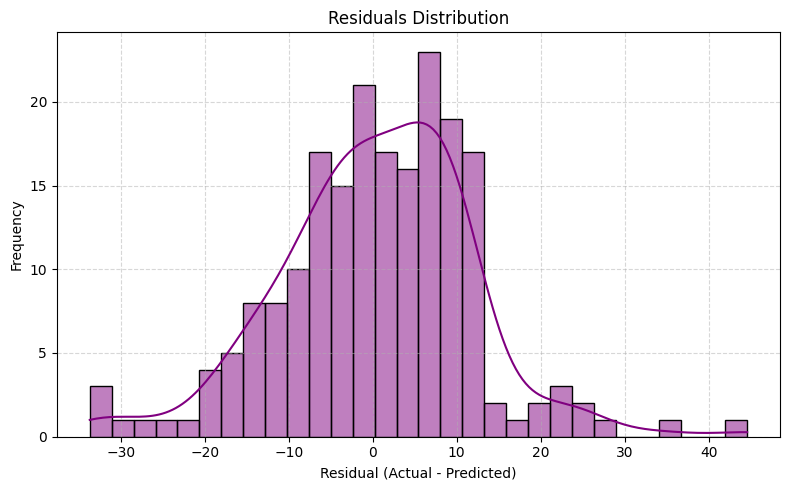

In [104]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True, color='purple')
plt.title('Residuals Distribution')
plt.xlabel('Residual (Actual - Predicted)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [105]:
# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE  = {mae:.2f}")
print(f"MSE  = {mse:.2f}")
print(f"RMSE = {rmse:.2f}")
print(f"R²   = {r2:.2f}")

MAE  = 8.77
MSE  = 130.88
RMSE = 11.44
R²   = 0.90
